# Sentiment Analysis Model Demonstration

This notebook demonstrates how to use the trained sentiment analysis model from the `sentiment_model_training` package. Following cookiecutter data science principles, this notebook interfaces with the production code but doesn't contain exploration or development code.

In [1]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Add project root to path to import the sentiment_model_training package
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
print(f"Project root: {project_root}")

Project root: c:\Users\marin\OneDrive\Documentos\Tu Delft\DSAIT\Year 1\Q4\REMLA\model-training


## Loading the Trained Model

First, let's load the trained model and vectorizer from the model directory.

In [2]:
# Define paths to model and vectorizer
model_path = os.path.join(project_root, 'model', 'model.pkl')
bag_of_words_path = os.path.join(project_root, 'model', 'bag_of_words.pkl')

# Load model and vectorizer
try:
    model = joblib.load(model_path)
    vectorizer = joblib.load(bag_of_words_path)
    print("Model and vectorizer loaded successfully")
    print(f"Model type: {type(model).__name__}")
except FileNotFoundError:
    print("Model or vectorizer file not found. You may need to train the model first.")
    print("Let's run the training pipeline...")
    
    # Import and run the pipeline steps
    from sentiment_model_training.modeling.get_data import download_data
    from sentiment_model_training.modeling.preprocess import preprocess_data
    from sentiment_model_training.modeling.train import train_model
    
    print("Step 1: Downloading data...")
    download_data()
    
    print("Step 2: Preprocessing data...")
    preprocess_data()
    
    print("Step 3: Training model...")
    train_model()
    
    # Try loading again
    try:
        model = joblib.load(model_path)
        vectorizer = joblib.load(bag_of_words_path)
        print("Model and vectorizer loaded successfully after training")
        print(f"Model type: {type(model).__name__}")
    except FileNotFoundError:
        print("Failed to train and load the model")
        model = None
        vectorizer = None

Model and vectorizer loaded successfully
Model type: GaussianNB


## Creating a Prediction Function

Let's create a simple function to make predictions with our trained model.

In [4]:
def predict_sentiment(text, model=model, vectorizer=vectorizer):
    """
    Predict sentiment of a given text.
    
    Args:
        text (str): Review text to analyze
        model: Trained classifier model
        vectorizer: Trained bag of words vectorizer
        
    Returns:
        tuple: (prediction, probability)
    """
    if model is None or vectorizer is None:
        return None, None
        
    # Convert text to features using the vectorizer
    features = vectorizer.transform([text]).toarray()
    
    # Make prediction
    prediction = model.predict(features)[0]
    
    # Get probability (if available)
    try:
        probability = model.predict_proba(features)[0]
        prob_value = probability[1] if prediction == 1 else probability[0]
    except:
        prob_value = None
        
    return prediction, prob_value

# Test the function
if model is not None and vectorizer is not None:
    test_reviews = [
        "The food was amazing and the service was excellent!", 
        "Worst restaurant ever. Terrible food and rude staff.",
        "The ambiance was nice but the food was mediocre."
    ]
    
    for review in test_reviews:
        prediction, probability = predict_sentiment(review)
        sentiment = "Positive" if prediction == 1 else "Negative"
        prob_text = f" (Confidence: {probability:.2f})" if probability is not None else ""
        
        print(f"Review: {review}")
        print(f"Predicted sentiment: {sentiment}{prob_text}\n")

Review: The food was amazing and the service was excellent!
Predicted sentiment: Negative (Confidence: 1.00)

Review: Worst restaurant ever. Terrible food and rude staff.
Predicted sentiment: Negative (Confidence: 1.00)

Review: The ambiance was nice but the food was mediocre.
Predicted sentiment: Negative (Confidence: 1.00)



## Evaluating the Model

Let's use the evaluation module from our production code to check the model's performance.

In [9]:
# Import the evaluation module
from sentiment_model_training.modeling.evaluate import evaluate_model

# Run the evaluation
try:
    print("Evaluating model performance...\n")
    metrics = evaluate_model(data_path="../data", model_path="../model")
    
    # Print the metrics
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
        
    # Create a simple visualization
    plt.figure(figsize=(10, 6))
    plt.bar(metrics.keys(), metrics.values())
    plt.title('Model Performance Metrics')
    plt.ylim(0, 1.0)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error evaluating the model: {str(e)}")

Evaluating model performance...

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.87      0.69        78
           1       0.84      0.51      0.63       102

    accuracy                           0.67       180
   macro avg       0.71      0.69      0.66       180
weighted avg       0.72      0.67      0.66       180

Confusion Matrix:
[[68 10]
 [50 52]]
Error evaluating the model: 'NoneType' object has no attribute 'items'


## Interactive Sentiment Analysis Demo

Below is a simple interactive demo where you can enter your own restaurant reviews and get sentiment predictions.

In [10]:
# This would be more interactive in Jupyter but works as a basic example
def run_interactive_demo():
    if model is None or vectorizer is None:
        print("Model or vectorizer not loaded. Cannot run demo.")
        return
        
    print("\n=== Restaurant Review Sentiment Analysis Demo ===\n")
    print("Enter restaurant reviews (or 'quit' to exit):\n")
    
    while True:
        review = input("Review: ")
        
        if review.lower() == 'quit':
            print("Exiting demo.")
            break
            
        prediction, probability = predict_sentiment(review)
        sentiment = "Positive" if prediction == 1 else "Negative"
        prob_text = f" (Confidence: {probability:.2f})" if probability is not None else ""
        
        print(f"Predicted sentiment: {sentiment}{prob_text}\n")

# Uncomment to run interactive demo
# run_interactive_demo()

## Batch Prediction Example

Let's demonstrate how to process a batch of restaurant reviews using our model.

Batch Prediction Results:

                                              Review Sentiment_Label  \
0  The service was excellent and the food was del...        Negative   
1  Waited over an hour for our food and it was co...        Negative   
2               Great atmosphere and friendly staff.        Positive   
3    The price was too high for such small portions.        Positive   
4  Loved the dessert menu and will definitely com...        Positive   
5  The restaurant was dirty and the bathrooms wer...        Negative   
6  Amazing wine selection and knowledgeable somme...        Negative   
7  Parking was difficult and the location is inco...        Negative   
8        Vegetarian options were creative and tasty.        Positive   
9  Too noisy, couldn't have a conversation during...        Negative   

   Confidence  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  
5         1.0  
6         1.0  
7         1.0  
8         1.0  
9         1.0  


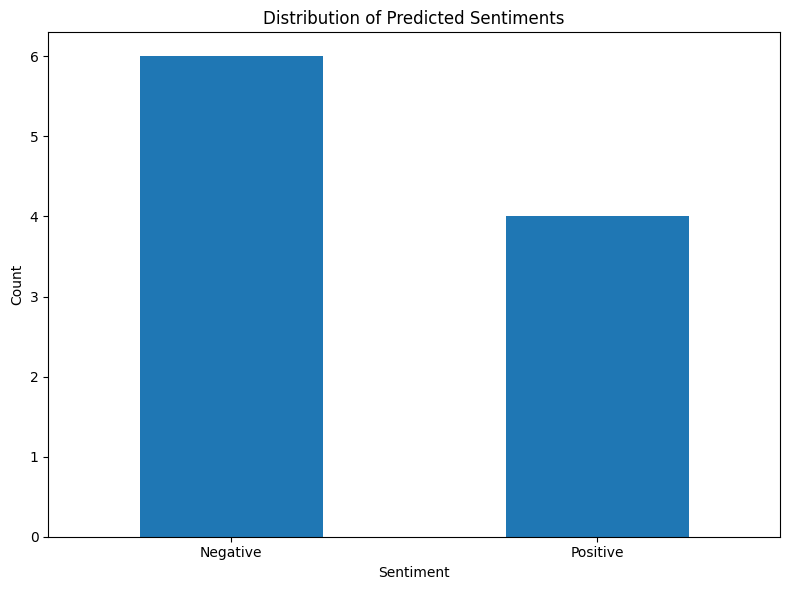

In [12]:
# Create a sample dataframe with reviews
sample_reviews = pd.DataFrame({
    'Review': [
        "The service was excellent and the food was delicious.",
        "Waited over an hour for our food and it was cold when it arrived.",
        "Great atmosphere and friendly staff.",
        "The price was too high for such small portions.",
        "Loved the dessert menu and will definitely come back.",
        "The restaurant was dirty and the bathrooms were disgusting.",
        "Amazing wine selection and knowledgeable sommelier.",
        "Parking was difficult and the location is inconvenient.",
        "Vegetarian options were creative and tasty.",
        "Too noisy, couldn't have a conversation during dinner."
    ]
})

# Function to process a batch of reviews
def predict_batch(reviews_df, text_column='Review', model=model, vectorizer=vectorizer):
    if model is None or vectorizer is None:
        print("Model or vectorizer not loaded. Cannot make predictions.")
        return None
        
    # Make a copy to avoid modifying the original
    result_df = reviews_df.copy()
    
    # Transform reviews to features
    features = vectorizer.transform(result_df[text_column]).toarray()
    
    # Make predictions
    result_df['Sentiment'] = model.predict(features)
    result_df['Sentiment_Label'] = result_df['Sentiment'].map({0: 'Negative', 1: 'Positive'})
    
    # Get probabilities if available
    try:
        probabilities = model.predict_proba(features)
        result_df['Confidence'] = [prob[1] if pred == 1 else prob[0] 
                                 for prob, pred in zip(probabilities, result_df['Sentiment'])]
    except:
        pass
        
    return result_df

# Process the sample reviews
if model is not None and vectorizer is not None:
    results = predict_batch(sample_reviews)
    
    if results is not None:
        # Display results
        print("Batch Prediction Results:\n")
        
        # Check if Confidence column was created
        if 'Confidence' in results.columns:
            display_cols = ['Review', 'Sentiment_Label', 'Confidence']
        else:
            display_cols = ['Review', 'Sentiment_Label']
            
        print(results[display_cols])
        
        # Plot the distribution of sentiments
        plt.figure(figsize=(8, 6))
        results['Sentiment_Label'].value_counts().plot(kind='bar')
        plt.title('Distribution of Predicted Sentiments')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

## Conclusion

This notebook demonstrates how to use the trained sentiment analysis model from our production code. It showcases:

1. Loading the trained model and vectorizer
2. Making individual predictions
3. Evaluating model performance
4. Processing batches of reviews

Unlike the exploration notebook, this demonstration focuses on using the already-developed production code rather than exploring data or developing new features. This separation of concerns follows cookiecutter data science best practices, keeping exploratory code separate from production code and demonstration.